# Practica 3
# Regresión logística multi-clase y redes neuronales


El objetivo de esta primera parte de la práctica es aplicar regresión logística multi-clase al reconocimiento de imágenes que representan números escritos a mano.

Alumnos: Andrés Puente y Francisco Lopez

## Visualizacion de los datos

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy . io import loadmat
import scipy.optimize as opt

data = loadmat('ex3data1.mat')
# se pueden consultar las claves con data.keys() 5 
y = data ['y']
X = data ['X']
# almacena los datos leídos en X, y

m = X.shape[0]
n = X.shape[1]

XStack = np.hstack([np.ones((len(X), 1)), X])
y = np.ravel(y)

#print(XStack.shape)

# Selecciona aleatoriamente 10 ejemplos y los pinta
sample = np.random.choice(m , 10) 
plt.imshow(X[sample, :].reshape(-1, 20).T)
plt.axis('off')


(-0.5, 199.5, 19.5, -0.5)

## Vectorizacion de la regresion logistica

(-0.5, 199.5, 19.5, -0.5)

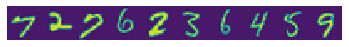

In [2]:
def sigmoide(value):
    s = 1/(1+np.exp(-value))
    return s

def gradiente(O, X, Y, lamb):
    H = sigmoide(np.dot(X, O))
    return (np.dot((1.0/len(X)), X.T).dot(H-Y))+(lamb/len(X))*O

#Version sin regularizar
def cost(O, X, Y):
    H = sigmoide(np.dot(X, O))
    op1 = float(1)/len(X)
    op2 = (np.dot(np.log(H).T, -Y))
    op3 = 1-Y
    op4 = (np.log(1-H)).T
    return op1 * (op2 - np.dot(op3, op4))

#Version regularizada
def cost2(O, X, Y, lamb):
    H = sigmoide(np.dot(X, O))
    op1 = float(1)/len(X)
    op2 = (np.dot(np.log(H).T, -Y))
    op3 = 1-Y
    op4 = (np.log(1-H)).T
    op5 = (lamb/(2*len(X)))*np.sum(O**2)
    return op1 * (op2 - np.dot(op3, op4)) + op5

# Selecciona  aleatoriamente  10  ejemplos  y  los  pinta
sample = np.random.choice(X.shape[0], 10)
plt.imshow(X[sample, :].reshape(-1, 20).T)
plt.axis('off')


## Clasificacion de 1 vs all
oneVsAll entrena varios clasificadores por regresión logística con término de regularización ’reg ’ y devuelve el resultado en una matriz , donde 5 la fila i−ésima corresponde al clasificador de la etiqueta i−ésima 

In [3]:
def oneVsAll(X, y, num_etiquetas , reg):
    theta = np.zeros([num_etiquetas, X.shape[1]])
    for i in range (num_etiquetas):
        if(i == 0):
            iaux = 10
        else:
            iaux = i
        a = (y == iaux)*1
        theta[i] = opt.fmin_tnc(cost2, theta[i], gradiente,args = (X, a, reg))[0]
    return theta

theta_opt = oneVsAll(XStack, y, 10, 0.1)

resultado = sigmoide(XStack.dot(np.transpose(theta_opt)))

#Este será un array de (1, 5000) con las posibilidades de que un numero haya sido predecido correctamente
prediccion = resultado.argmax(axis = 1)
prediccion[prediccion == 0] = 10

Z = (prediccion == y)
probabilidad = sum(Z)/len(y)

print("La probabilidad de acierto del programa es: ", probabilidad*100, "%")

La probabilidad de acierto del programa es:  96.48 %


## Redes Neuronales

In [4]:
data = loadmat('ex3data1.mat')
Y = data['y']  # Representa el valor real de cada ejemplo de entrenamiento de X (y para cada X)
X = data['X']  # Cada fila de X representa una escala de grises de 20x20 desplegada linearmente (400 pixeles)
Y = np.ravel(Y)

X_unos = np.hstack([np.ones((len(X), 1)),X])

weights = loadmat('ex3weights.mat')
theta1, theta2 = weights['Theta1'], weights ['Theta2']


#Propagación hacia delante
aux = sigmoide(X_unos.dot(theta1.T))
aux = np.hstack([np.ones((len(aux),1)), aux])
#El resultado de utilizar la red neuronal será una matriz de 5000 x 10, con las probabilidades de que cada caso sea un numero.
results = sigmoide(aux.dot(theta2.T))

prediccion = results.argmax(axis = 1)+1 #Este será un array de (1, 5000) con las posibilidades de que un numero haya sido predecido correctamente

Z = (prediccion == Y)
probabilidad = sum(Z)/len(Y)

print("La probabilidad de acierto del programa es: ", probabilidad*100, "%")

La probabilidad de acierto del programa es:  97.52 %
